<font size = "8">Customer Conversion Prediction</font>

# Problem Statement

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 

# Data


The historical sales data is available in the below link

https://drive.google.com/file/d/1BJ_Q8Q-kDRisAQyLltBQggeb0QmdWGZy/view?usp=sharing

# Features:

●	age (numeric)

●	job : type of job

●	marital : marital status

●	educational_qual : education status

●	call_type : contact communication type

●	day: last contact day of the month (numeric)

●	mon: last contact month of year

●	dur: last contact duration, in seconds (numeric)

●	num_calls: number of contacts performed during this campaign and for this client 

# Output variable (desired target):

●	y - has the client subscribed to the insurance?



# Minimum Requirements

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the conversion rate. 

F1 score must be used as a metric to evaluate the performance of the models. 


# This is SUPERVISED LEARNING PROBLEM:

We have target variable y.
It is classification problem.
y is a discrete variable.
trying to build a ML model to predict if a client will subscribe to the insurance.

When we are solving classification problem, We want to check is it balanced or imbalanced

# Importing Libraries

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings("ignore")

# Importing  data

In [96]:
df = pd.read_csv('train.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [97]:
df.shape

(45211, 11)

There are 45211 rows and 11 columns( 10 are feature columns and 1 is target column)

# Exploring the dataset

In [98]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [99]:
df.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [100]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [101]:
df.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [102]:
df.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [103]:
df.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [104]:
df.mon.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [105]:
df.dur.values

array([ 261,  151,   76, ..., 1127,  508,  361], dtype=int64)

In [106]:
df.num_calls.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [107]:
df.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [108]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Checking balanced or not

In [109]:
no_class = ((39922)/(39933+5289))*100
yes_class = ((5289)/(39933+5289))*100
print('yes :', yes_class, 'no :', no_class)

yes : 11.69563486798461 no : 88.28004068816064


Target column 'y' is imbalanced 

1. Majority class is no -- 88.3%
2. Minority class is yes -- 11.7%

# Map the target column

In [110]:
df['y']=df['y'].map({'yes':1,'no':0})

# DATA PREPROCESSING

# data cleaning

In data cleaning i am going to do 4 steps
1. Missing values and checking duplicated data
2. Spelling corrections
3. check for data format(data type)
4. check for outlier

# First - check is there any missing values and is there duplicate

In [111]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There are no Null values in the data 

Check for duplicate data

In [112]:
df.duplicated().sum()

6

There are 6 duplicates in the data.

Remove the duplicates and check whether they are removed or not

In [113]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [114]:
df.shape

(45205, 11)

# Second - Check for spelling mistakes

In [115]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [116]:
print(df['job'].unique())
print(df['marital'].unique())
print(df['education_qual'].unique())
print(df['call_type'].unique())
print(df['mon'].unique())
print(df['prev_outcome'].unique())
print(df['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
[0 1]


There are no spelling mistakes

# check the data format

In [117]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

Data in all column are in correct format , no need to change anything

# Check for Outliers

In [118]:
df.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


**Age column**

In [119]:
q3 = df.age.quantile(0.75)
q1=df.age.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)
print('Max age :', max(df.age), 'Min age :', min(df.age))

upper_threshold: 70.5 lower_threshold: 10.5
Max age : 95 Min age : 18


There are outliers in age column but am keeping those as it is

**Day**

In [120]:
q3 = df.day.quantile(0.75)
q1=df.day.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)
print('Max day :', max(df.day), 'Min day :', min(df.day))

upper_threshold: 40.5 lower_threshold: -11.5
Max day : 31 Min day : 1


There are no outliers in Day column

**Dur column**

In [121]:
q3 = df.dur.quantile(0.75)
q1=df.dur.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)
print('Max dur :', max(df.dur), 'Min dur :', min(df.dur))
df.dur=df.dur.clip(upper_threshold,lower_threshold)
df.describe()

upper_threshold: 643.0 lower_threshold: -221.0
Max dur : 4918 Min dur : 0


,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,234.95620,2.763898,0.117000
std,10.619130,8.32234,176.75476,3.098189,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,95.000000,31.00000,643.00000,63.000000,1.000000


There are outliers in Dur Column and clipped those

**num_calls**

In [122]:
q3 = df.num_calls.quantile(0.75)
q1=df.num_calls.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)
print('Max num_calls :', max(df.num_calls), 'Min num_calls :', min(df.num_calls))
df.num_calls=df.num_calls.clip(upper_threshold,lower_threshold)
df.describe()

upper_threshold: 6.0 lower_threshold: -2.0
Max num_calls : 63 Min num_calls : 1


,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235,0.117000
std,10.619130,8.32234,176.75476,1.600152,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,95.000000,31.00000,643.00000,6.000000,1.000000


There are outliers in num_calls and clipped those outliers

# EDA

From EDA we can decide which encoding can be done and feature relationships and feature importance

# Features distribution

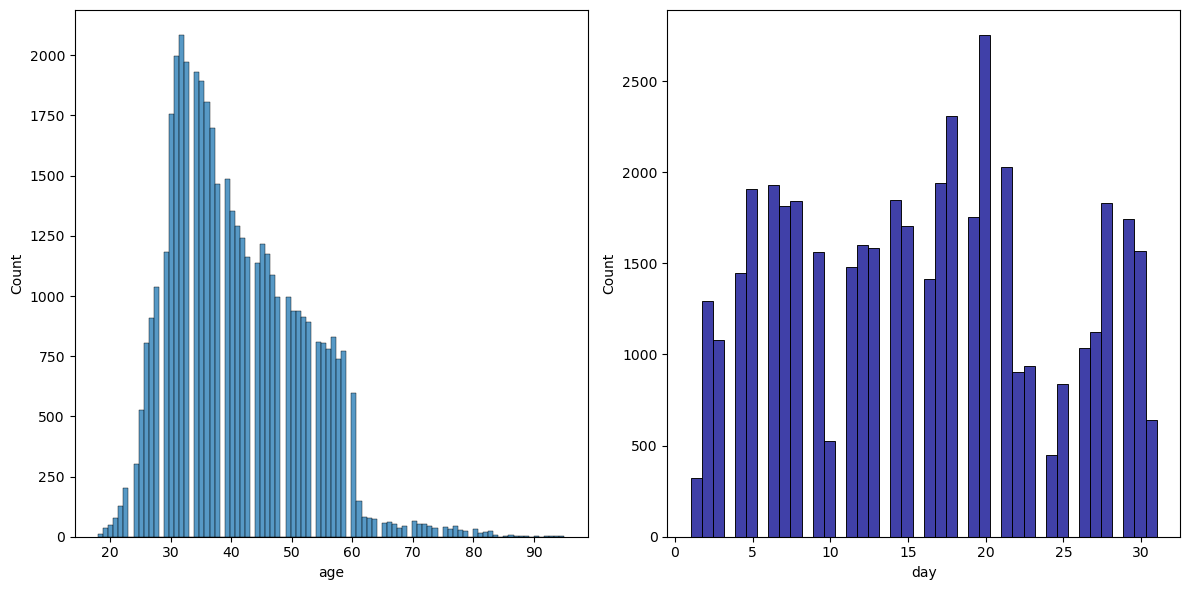

In [123]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df.age)
plt.subplot(1,2,2)
sns.histplot(df.day,color = 'darkblue')
plt.tight_layout()

Age is distributed between 18 and 95

Day is distributed between 1 and 31

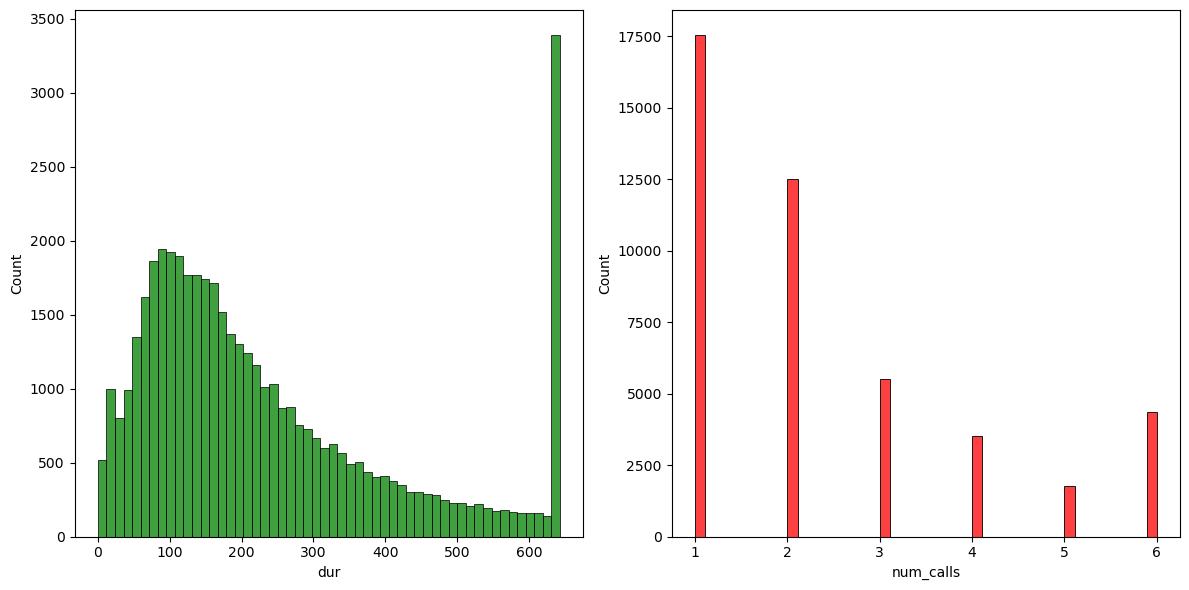

In [124]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df.dur,color = 'green')
plt.subplot(1,2,2)
sns.histplot(df.num_calls,color = 'red')
plt.tight_layout()
     

dur is distributed between 0 and 1500

num_calls is distributed between 1 and 30

# percentage distribution

# JOB

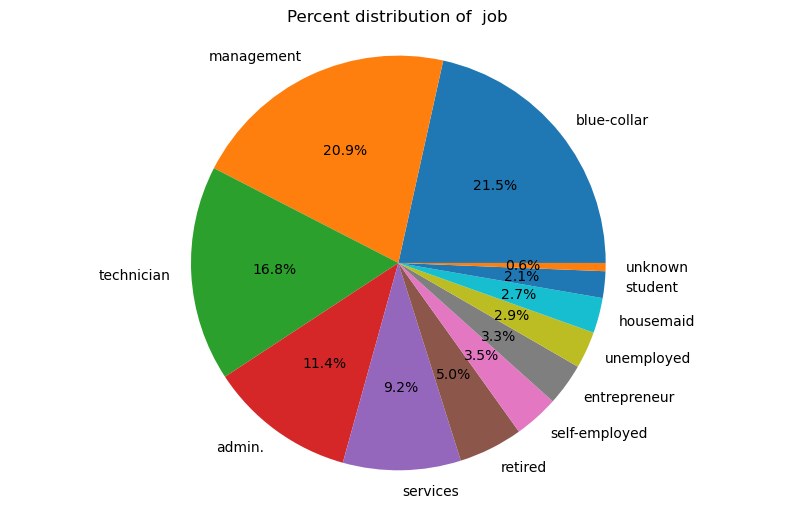

In [125]:
plt.figure(figsize=(10,6))
df_source = df.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  job')
plt.axis('equal')
plt.show()

From the above graph we can get to know more percentage of customers are in blue-collar job category and unknown category is having less percentage of customers

# MARITAL

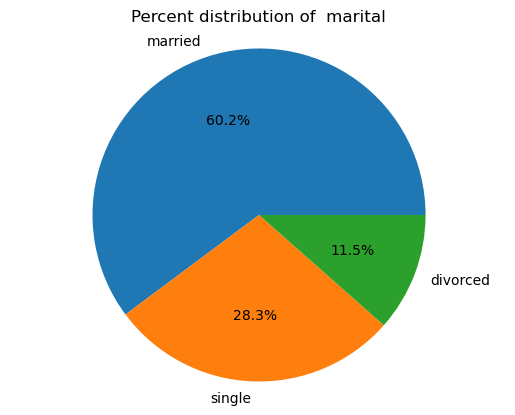

In [126]:
df_source = df.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  marital')
plt.axis('equal')
plt.show()
     

from the above graph of marital status , we get to know Married is distributed more than Single than Divorced

# Education

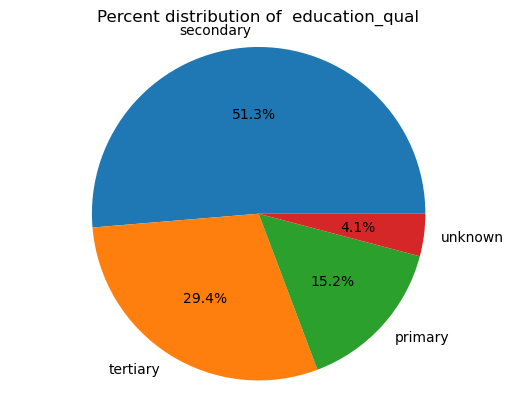

In [127]:
df_source = df.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  education_qual')
plt.axis('equal')
plt.show()


From this graph of educational qualification we get to know, Secondary is more distribued that others 

# Call Type

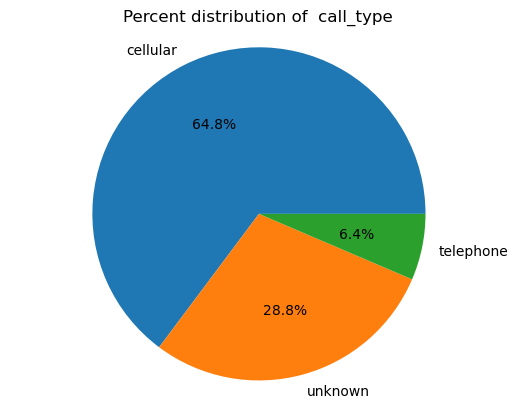

In [128]:
df_source = df.call_type.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  call_type')
plt.axis('equal')
plt.show()

From this graph of call type we get to know, Cellular is more distribued that others 

# Month

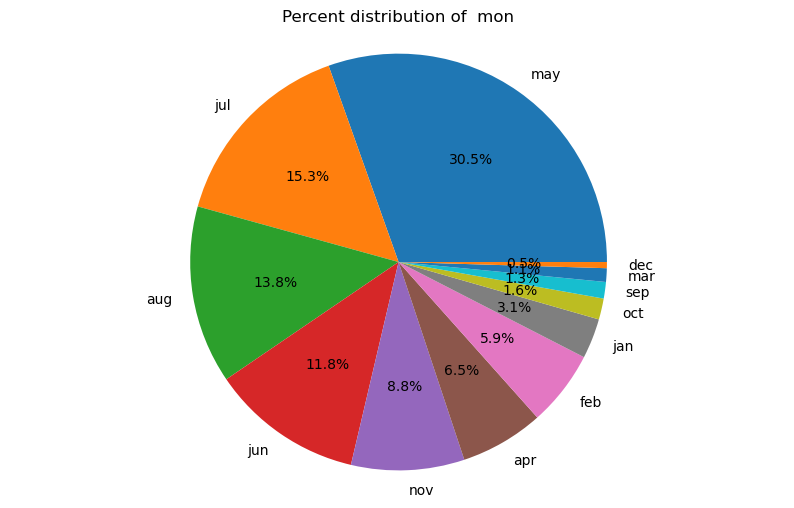

In [129]:
plt.figure(figsize=(10,6))
df_source = df.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  mon')
plt.axis('equal')
plt.show()

from this graph we can say May month is more distributed that others and Dec is least

# Prev_Outcome

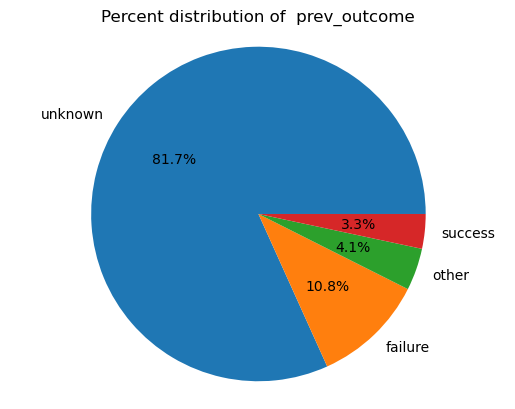

In [130]:
df_source = df.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  prev_outcome')
plt.axis('equal')
plt.show()

In percentage wise distribution in previous outcome ,we got unknown distributed more than others.

# Features in Percentage are put together

In [131]:
# plt.figure(figsize=(18,10))

# plt.subplot(231)
# df_source = df.job.value_counts()
# df_source = df_source.reset_index()
# plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
# plt.title('Percent distribution of  job')
# plt.axis('equal')

# plt.subplot(232)
# df_source = df.marital.value_counts()
# df_source = df_source.reset_index()
# plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
# plt.title('Percent distribution of  marital')
# plt.axis('equal')

# plt.subplot(233)
# df_source = df.education_qual.value_counts()
# df_source = df_source.reset_index()
# plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
# plt.title('Percent distribution of  education_qual')
# plt.axis('equal')

# plt.subplot(234)
# df_source = df.call_type	.value_counts()
# df_source = df_source.reset_index()
# plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
# plt.title('Percent distribution of  call_type	')
# plt.axis('equal')

# plt.subplot(235)
# df_source = df.mon.value_counts()
# df_source = df_source.reset_index()
# plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
# plt.title('Percent distribution of  mon')
# plt.axis('equal')

# plt.subplot(236)
# df_source = df.prev_outcome.value_counts()
# df_source = df_source.reset_index()
# plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
# plt.title('Percent distribution of  prev_outcome')
# plt.axis('equal')

# plt.tight_layout()
# plt.show()

# Box Plot for Call_Type, Mon, Prev_Outcome and day

In [132]:
# A=df['call_type'].groupby(df['call_type']).count()
# B=df['mon'].groupby(df['mon']).count()
# C=df['prev_outcome'].groupby(df['prev_outcome']).count()
# D=df['education_qual'].groupby(df['education_qual']).count()

In [133]:
# plt.figure(figsize=(15,10))

# plt.subplot(2,4,1)
# sns.barplot(x=A.index,y=A.values,data=df)
# plt.title('call_type DISTRIBUTION')

# plt.subplot(2,4,2)
# sns.barplot(x=B.index,y=B.values,data=df)
# plt.title('mon DISTRIBUTION')


# plt.subplot(2,4,3)
# sns.barplot(x=C.index,y=C.values,data=df)
# plt.title('prev_outcome DISTRIBUTION')

# plt.subplot(2,4,4)
# sns.barplot(x=D.index,y=D.values,data=df)
# plt.title('education DISTRIBUTION')


# plt.show()
# plt.tight_layout()

CELLUAR: Cellular distibuted more than others. It may be one of the reason now a days cellular is used more than others.

MON: May distributed more than others. It may be vocation time for the people.

PREV_OUTCOME: Unknown distributed more than others. It may be the people who dont want to share the information.

Education: Secondary distributed more than others. 

# For Continous Column

# AGE

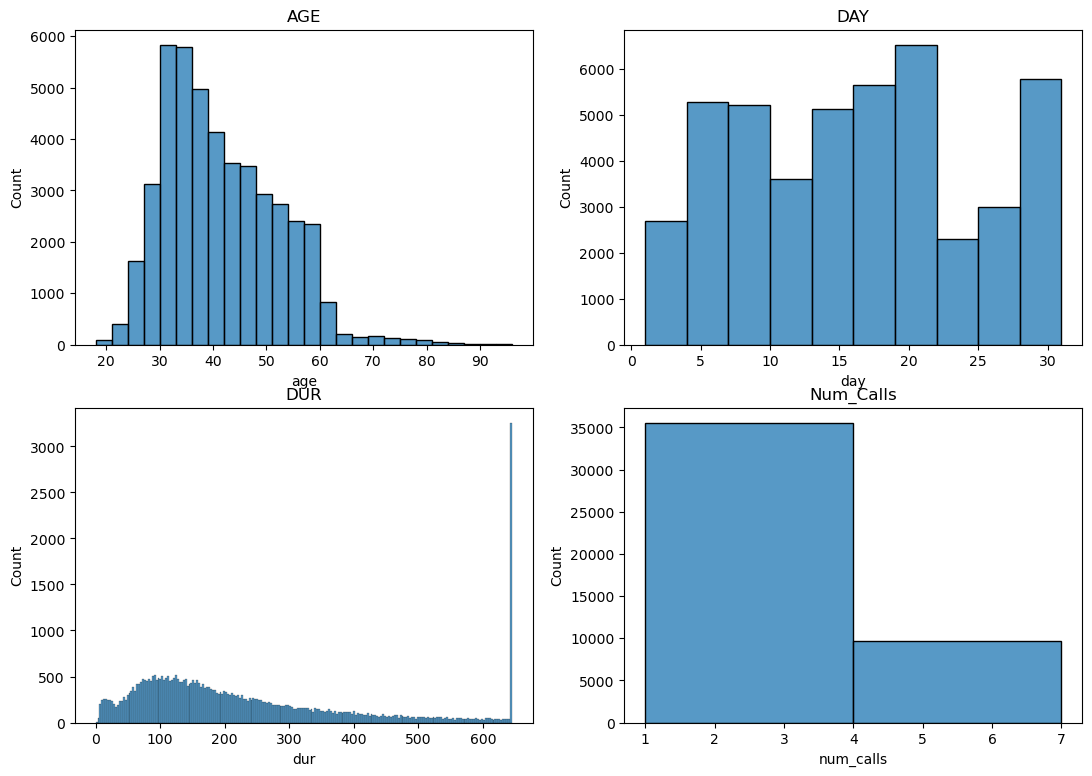

<Figure size 640x480 with 0 Axes>

In [134]:
plt.figure(figsize=(13,9))

plt.subplot(221)
sns.histplot(data=df, x="age", binwidth=3)
plt.title("AGE")


plt.subplot(222)
sns.histplot(data=df, x="day", binwidth=3)
plt.title("DAY")

plt.subplot(223)
sns.histplot(data=df, x="dur", binwidth=3)
plt.title("DUR")

plt.subplot(224)
sns.histplot(data=df, x="num_calls", binwidth=3)
plt.title("Num_Calls")


plt.show()
plt.tight_layout()

AGE : age is more distributed between 25 and 60

DUR : dur is distrubuted between 1 to 1500

Num_Calls : num_call can also be one which impact subscribe to insurance

# mapping unknown category with mode

In [135]:
cate_var=['job','education_qual']
for column in cate_var:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)

# FEATURE V/S TARGET

# Job v/s Y

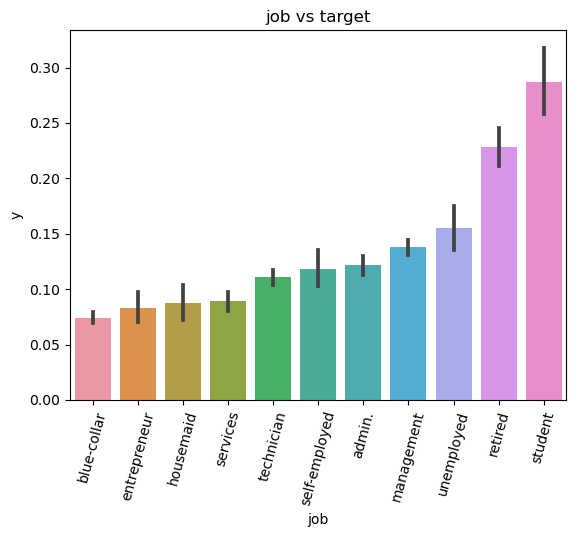

<Figure size 640x480 with 0 Axes>

In [136]:
sns.barplot(x='job',y='y',data=df,order=df.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=75)
plt.title('job vs target')
plt.show()
plt.tight_layout()

From this we got that students are targeted to subsribe the insurance more than others then retired people are targetted more


This is Categorical column and there is no order/ linear increase in this, we can do ONE-HOT Encoding but it may lead us to handel more number of columns so go with LABEL Encoding


{'blue-collar': 0, 'entrepreneur':1, 'housemaid':2,'services':3,'technician':4,'self-employed':5,'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10}


# Maritial v/s Y

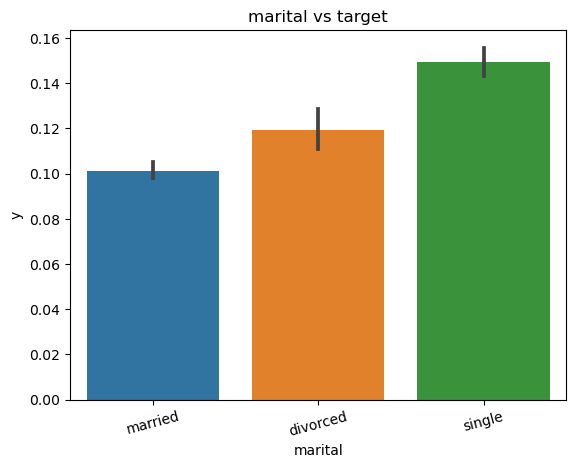

<Figure size 640x480 with 0 Axes>

In [137]:
sns.barplot(x='marital',y='y',data=df,order=df.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')
plt.show()
plt.tight_layout()

From this we got Single people targeted more than others

as there is no linear order in this, we can use One-Hot encoding, but to avoid creating columns we will go with Label encoding

{married:0, divorced:1, single:2}

# Education_qual V/s Y

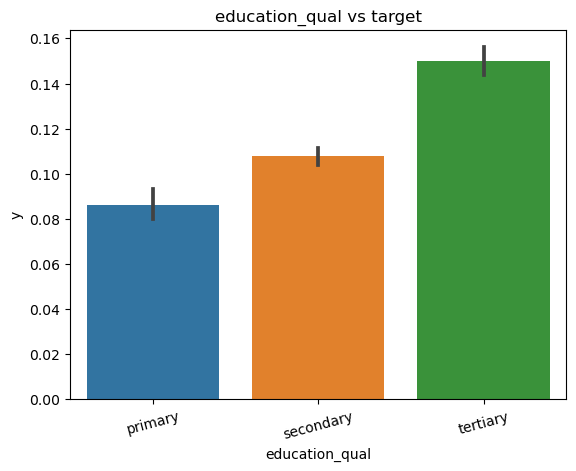

<Figure size 640x480 with 0 Axes>

In [138]:
sns.barplot(x='education_qual',y='y',data=df,order=df.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')
plt.show()
plt.tight_layout()

We get to know TERTIARY people interested subscribe to the insurance more than others.

Education qualification gives as a linear increase, so we will go with lable encoding.

{'primary':0,'secondary':1,'tertiary':2}

# Call type V/s Y

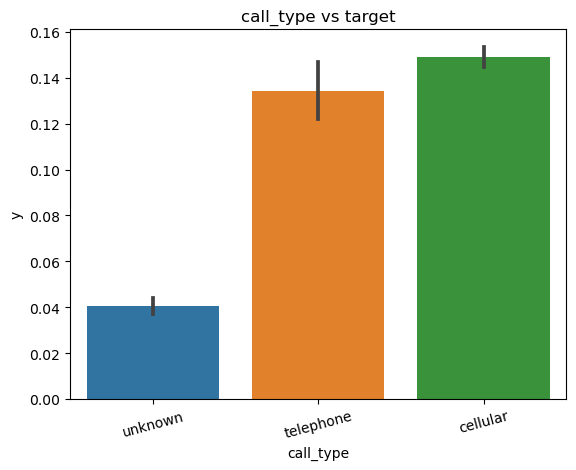

<Figure size 640x480 with 0 Axes>

In [139]:
sns.barplot(x='call_type',y='y',data=df,order=df.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')
plt.show()
plt.tight_layout()
     

We get to know CELLULAR people interested more to take the insurance more than others.

There is no linear increase in call_type column.so, we want to do one-hot encode. But here we took lable encoding to avoid columns complexity.

 {'unknown':0,'telephone':1,'cellular':2}

# Mon V/s Y

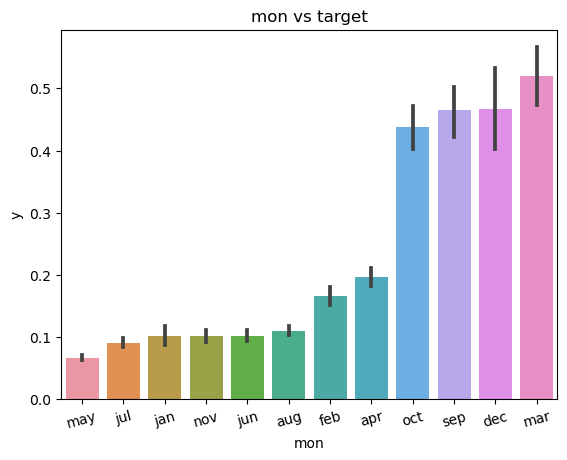

<Figure size 640x480 with 0 Axes>

In [140]:
sns.barplot(x='mon',y='y',data=df,order=df.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')
plt.show()
plt.tight_layout()

From the above graph we get to know MAR month is likely to take the insurance more than others. Because, the trend during the month of MARCH is high, as march being the end of financial year in INDIA and the month of DECEMBER is the second highest one may be becuase it is financial year end in most of other countries.

{'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11}

# Prev_outcome V/s Y

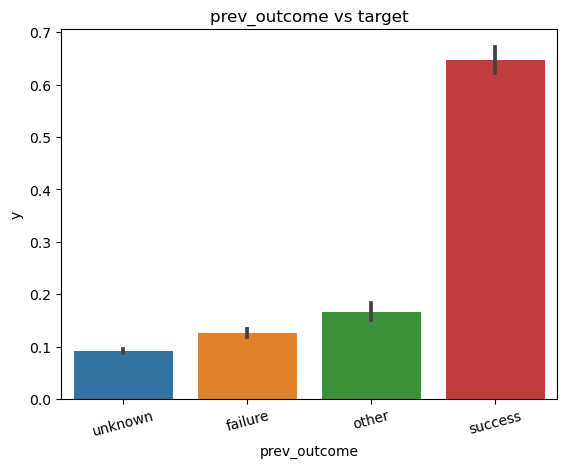

<Figure size 640x480 with 0 Axes>

In [141]:
sns.barplot(x='prev_outcome',y='y',data=df,order=df.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')
plt.show()
plt.tight_layout()

From the above grapg We get to know people with previous_outcome as SUCCESS in prevoius calls are more to subscribe the insurance more than others.

There is no linear increase in Previous outcome column. we have to do One-Hot Encoding. but to avoid creating more columns we will go with label encoding

{unknown:0, failure:1, other:2, success:3}

# FEATURE V/S TARGET PLOTS PUT TOGETHER

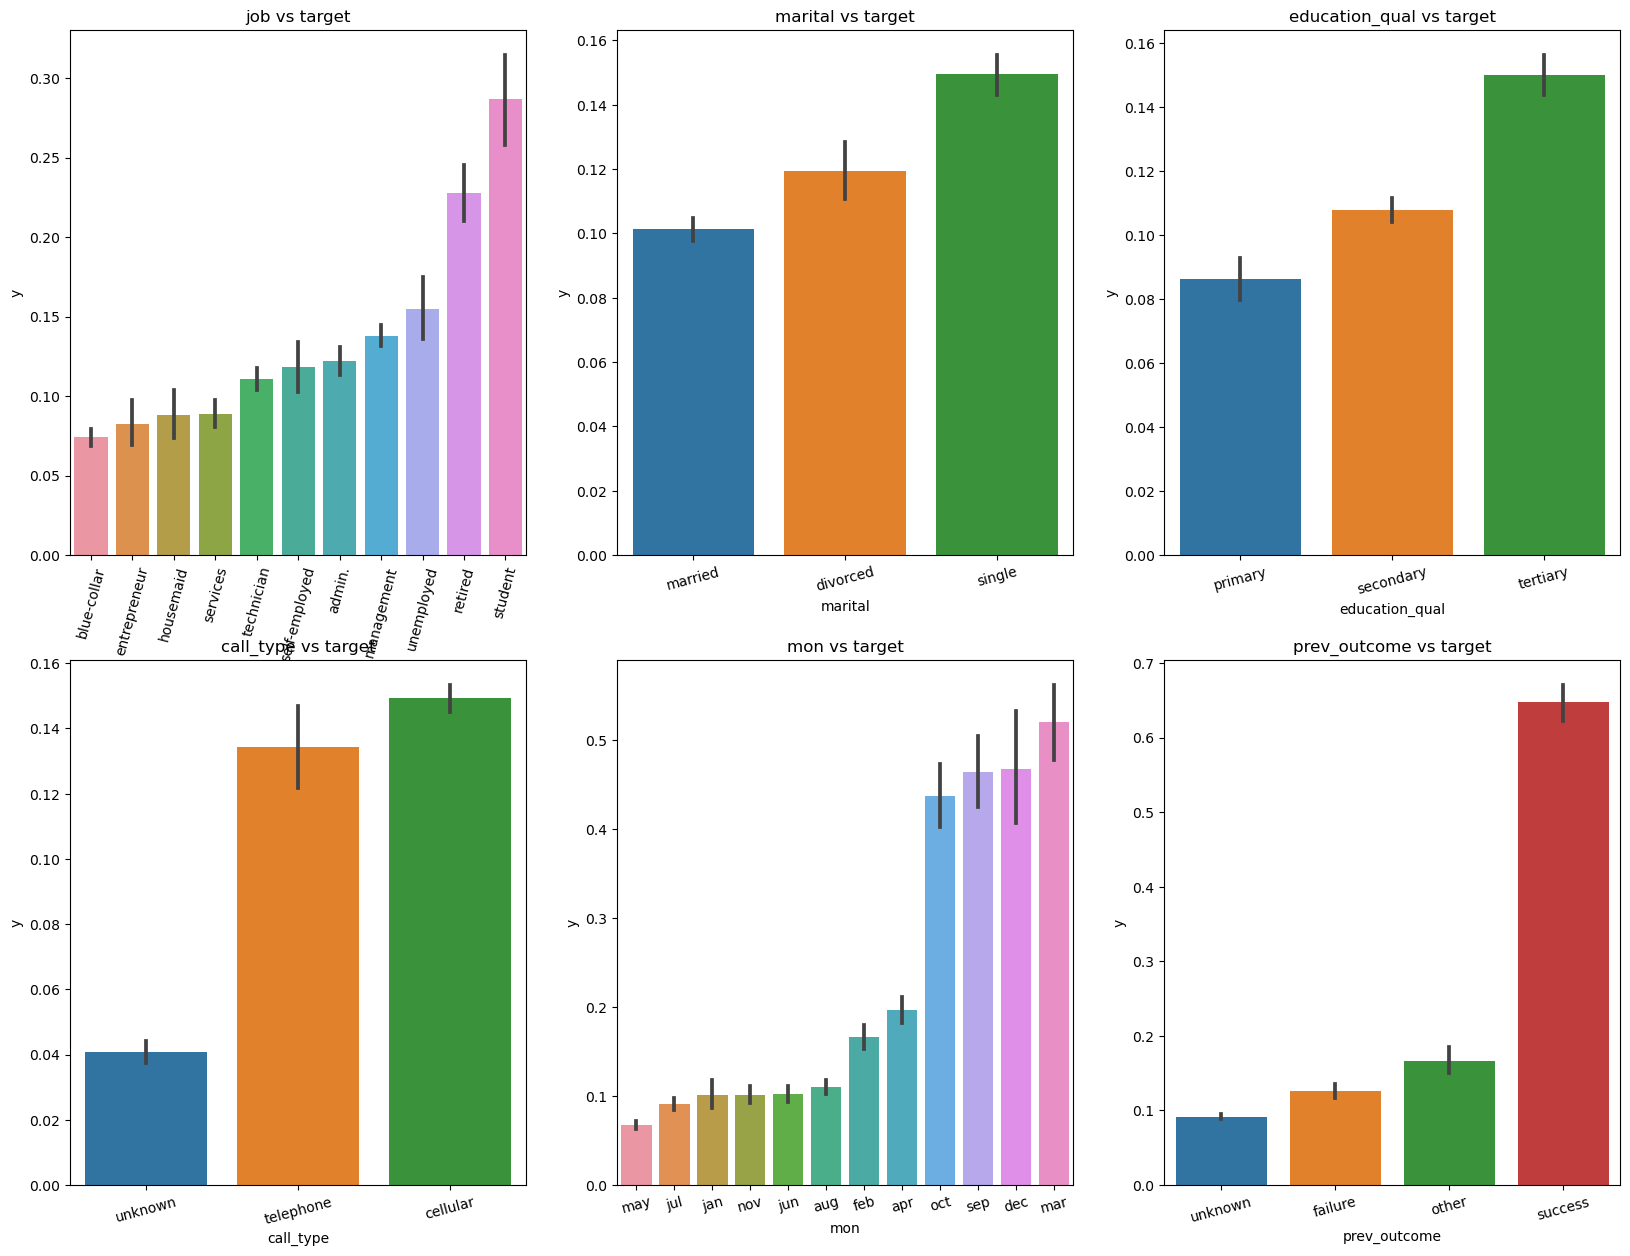

<Figure size 640x480 with 0 Axes>

In [142]:
plt.figure(figsize=(20,15))

plt.subplot(231)
sns.barplot(x='job',y='y',data=df,order=df.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=75)
plt.title('job vs target')

plt.subplot(232)
sns.barplot(x='marital',y='y',data=df,order=df.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')

plt.subplot(233)
sns.barplot(x='education_qual',y='y',data=df,order=df.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')

plt.subplot(234)
sns.barplot(x='call_type',y='y',data=df,order=df.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')

plt.subplot(235)
sns.barplot(x='mon',y='y',data=df,order=df.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')


plt.subplot(236)
sns.barplot(x='prev_outcome',y='y',data=df,order=df.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')


plt.show()
plt.tight_layout()

# CONTINUOUS FEATURES

# AGE

<AxesSubplot:xlabel='age', ylabel='y'>

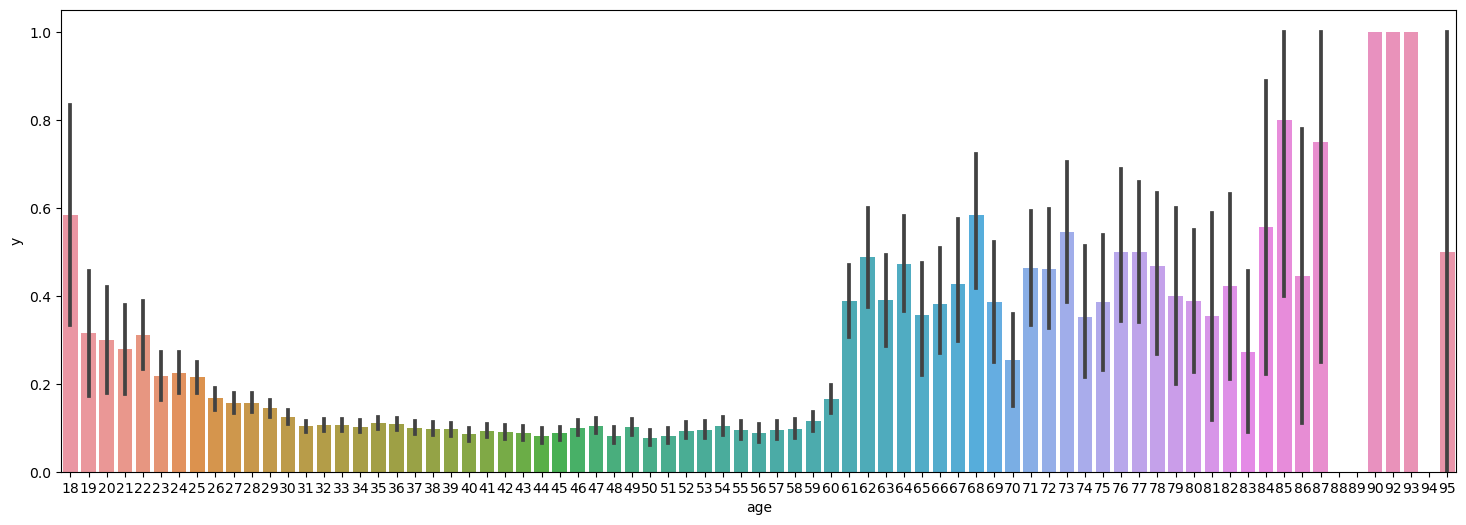

In [143]:
age_conversion_rates = df.groupby('age')['y'].mean()
sorted_age = age_conversion_rates.reset_index().sort_values('age')['age']
plt.figure(figsize=(18,6))
sns.barplot(x='age', y='y',data = df, order = sorted_age)

# sns.histplot(data=df, x="age", hue="y", multiple="stack",binwidth=3)
# plt.title('AGE VS TARGET')

# plt.show()
# plt.tight_layout()

# sns.histplot(x='age',hue='y',data=df)
# plt.title("Age Vs Target",)
# plt.xlabel("AGE")
# plt.show()

middle aged people are insured more than the young and aged ones

# DAY

<AxesSubplot:xlabel='day', ylabel='y'>

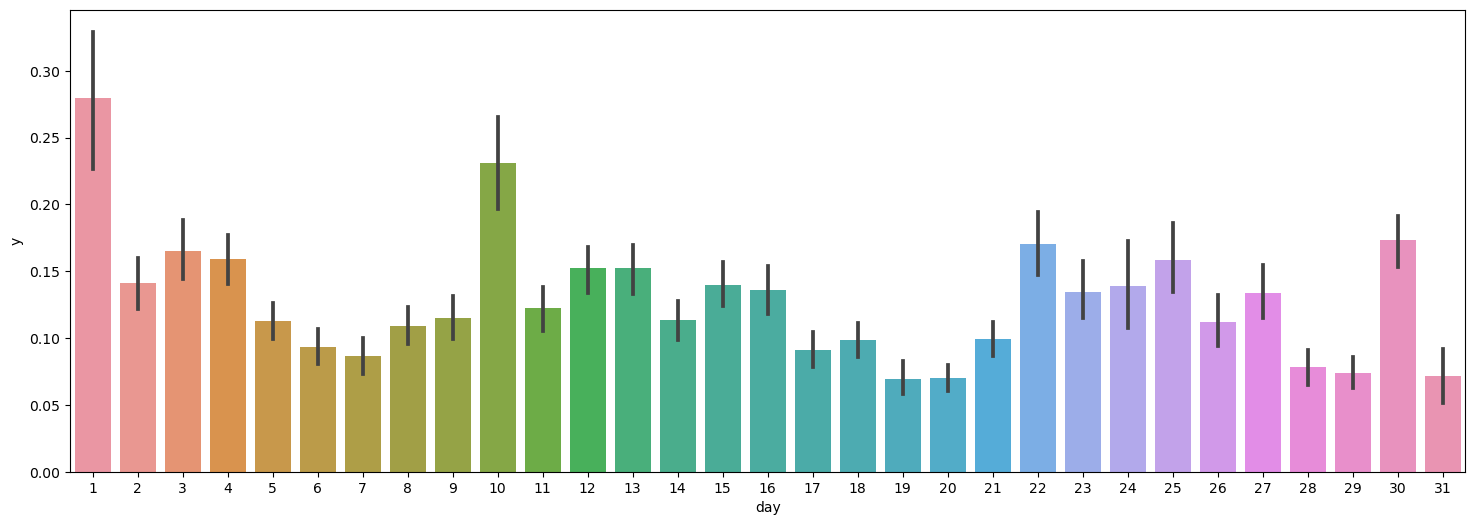

In [144]:
day_conversion_rates = df.groupby('day')['y'].mean()
sorted_day = day_conversion_rates.reset_index().sort_values('day')['day']
plt.figure(figsize=(18,6))
sns.barplot(x='day', y='y',data = df, order = sorted_day)

# sns.histplot(data=df, x="day", hue="y", multiple="stack",binwidth=3)
# plt.title('DAY VS TARGET')

# plt.show()
# plt.tight_layout()

from the above graph its clear thet day is not a reason for subscription, we can keep this or drop

In [145]:
df['dur'] = df['dur'].astype(int)

# DUR

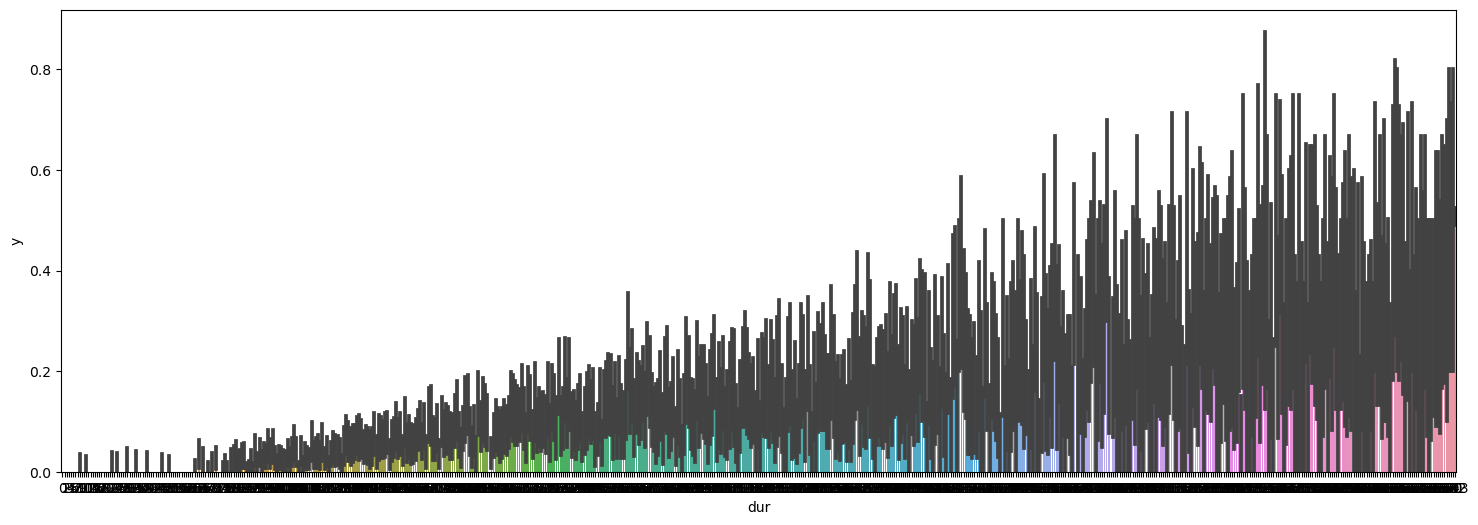

In [146]:
dur_conversion_rates = df.groupby('dur')['y'].mean()
sorted_dur = dur_conversion_rates.reset_index().sort_values('dur')['dur']
plt.figure(figsize=(18,6))
sns.barplot(x='dur', y='y',data = df, order = sorted_dur)
plt.show()

# # sns.histplot(data=df, x="dur", hue="y", multiple="stack",binwidth=3)
# # plt.title('DUR VS TARGET')
# # plt.show()
# # plt.tight_layout()

# sns.countplot(x='dur',hue='y',data=df) #numerical
# plt.title("Duration Vs Target")
# plt.xlabel("Duration")
# plt.show()

From the above graph we get to know dur is important for people to get insurance

In [147]:
df['num_calls'] = df['num_calls'].astype(int)

# Num_Calls

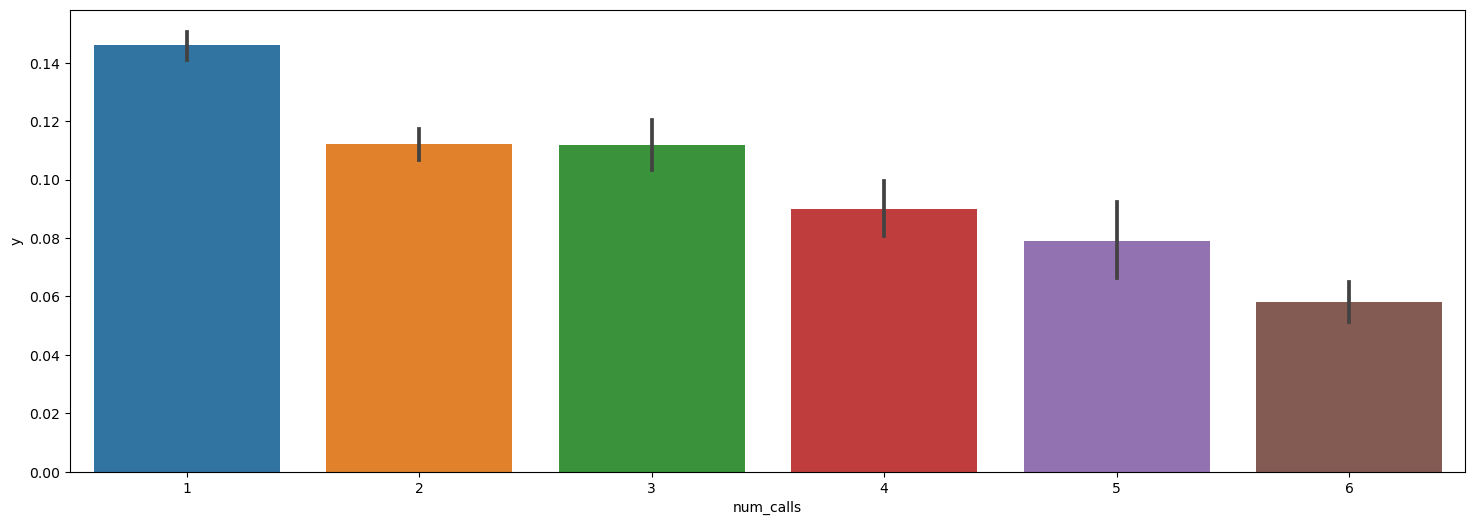

In [148]:
num_calls_conversion_rates = df.groupby('num_calls')['y'].mean()
sorted_num_calls = num_calls_conversion_rates.reset_index().sort_values('num_calls')['num_calls']
plt.figure(figsize=(18,6))
sns.barplot(x='num_calls', y='y',data = df, order = sorted_num_calls)
plt.show()


# sns.countplot(x='num_calls',hue='y',data=df) #numerical
# plt.title("Num_calls Vs Target")
# plt.xlabel("Num_calls")
# plt.show()

Num_calls is also a reason for people to get subsrsibed for insurance

# Put all cont. feature vs target plots together

In [149]:
# plt.figure(figsize=(15,10))

# plt.subplot(221)
# sns.histplot(data=df, x="age", hue="y", multiple="stack",binwidth=3)
# plt.title('AGE VS TARGET')

# plt.subplot(222)
# sns.histplot(data=df, x="day", hue="y", multiple="stack",binwidth=3)
# plt.title('DAY VS TARGET')

# plt.subplot(223)
# sns.histplot(data=df, x="dur", hue="y", multiple="stack",binwidth=3)
# plt.title('DUR VS TARGET')

# plt.subplot(224)
# sns.countplot(x='num_calls',hue='y',data=df) #numerical
# plt.title("Num_calls Vs Target")
# plt.xlabel("Num_calls")


# plt.show()


# FEATURE ANALYSIS

In [150]:
# import seaborn as sns
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='age', y='num_calls', hue='y', data=df, s=200)
# plt.title("age vs num_calls vs target", y=1.015, fontsize=20)
# plt.xlabel("age", labelpad=13)
# plt.ylabel("num_calls", labelpad=13)
# ax = plt.gca()
     

Age may be the reason to increase the number of calls

In [151]:
# import seaborn as sns
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='dur', y='num_calls', hue='y', data=df, s=200)
# plt.title("dur vs num_calls vs target", y=1.015, fontsize=20)
# plt.xlabel("dur", labelpad=13)
# plt.ylabel("num_calls", labelpad=13)
# ax = plt.gca()
     

From this plot we can observe that the people who doesn't subcribe the insurance will get calls more number of times.

Another view of the plot is the insurance subscribed more when they spend more duration to discuss.

FROM EDA PART,

The 3 feature importance in our point of view:

1. Number calls they made

2. Duration of the call they spend

3. Maritial status

# DATA ENCODING

In [152]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int32
num_calls          int32
prev_outcome      object
y                  int64
dtype: object

In [153]:
# df['dur'] = df['dur'].astype(int)
# df['num_calls'] = df['num_calls'].astype(int)

In [154]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int32
num_calls          int32
prev_outcome      object
y                  int64
dtype: object

In [155]:
df.to_csv("data_for_streamlit.csv", index = False)

# LABEL ENCODING

In [156]:
df['job']=df['job'].map({'blue-collar': 0, 'entrepreneur':1, 'housemaid':2,'services':3,'technician':4,
                         'self-employed':5,'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10})
df['education_qual']=df['education_qual'].map({'primary':0,'secondary':1,'tertiary':2})
df['call_type']=df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
df['mon']=df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})
# df['marital']=df['marital'].map({'married':0, 'divorced':1, 'single':2})
# df['prev_outcome']=df['prev_outcome'].map({'unknown':0, 'failure':1, 'other':2, 'success':3})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,married,2,0,5,0,261,1,unknown,0
1,44,4,single,1,0,5,0,151,1,unknown,0
2,33,1,married,1,0,5,0,76,1,unknown,0
3,47,0,married,1,0,5,0,92,1,unknown,0
4,33,0,single,1,0,5,0,198,1,unknown,0


# ONE-HOT ENCODING

In [157]:
df= pd.get_dummies(df, columns=["marital",'prev_outcome'])
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,7,2,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,1,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,0,1,0,5,0,198,1,0,0,0,1,0,0,0,1


We are done with Cleaning and Encoding the data 

now, we can move with target and feature selection

# TARGET AND FEATURE SELCTION:

In [158]:
X = df[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced','marital_married','marital_single','prev_outcome_failure','prev_outcome_other','prev_outcome_success','prev_outcome_unknown']].values
y = df['y'].values

we have selected features and target variable

# Split the data 

split into Train and Test

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify = y)

we completed splitting the data

80% of data will go to training and 20% will go to testing

In [160]:
X_test

array([[48,  7,  2, ...,  0,  0,  1],
       [35,  3,  1, ...,  0,  0,  0],
       [54,  0,  1, ...,  0,  0,  1],
       ...,
       [41,  7,  2, ...,  0,  0,  1],
       [32,  0,  1, ...,  0,  0,  1],
       [41,  7,  2, ...,  0,  0,  1]], dtype=int64)

In [161]:
# !pip install imblearn

In [162]:
import imblearn

In [163]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_smt, y_smt = smt.fit_resample(X_train, y_train) 

In [164]:
X_smt.shape, y_smt.shape

((53543, 15), (53543,))

In [165]:
import collections, numpy
counter = collections.Counter(y_smt)
counter

Counter({0: 23430, 1: 30113})

# Scaling

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_smt)
X_test_scaled = scaler.transform(X_test)

In [167]:
# Creating empty lists

model_list = []
Accuracy_list = []
f1_score_list = []
Roc_AUC_score = []

# 1. Logistic Regression:

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
y_pred = lr.predict(X_test)
print("Training Accuracy :",lr.score(X_smt,y_smt))
print("Testing Accuracy :",lr.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))
model_list.append('Logistic Regression')
Accuracy_list.append(lr.score(X_test,y_test))
f1_score_list.append(f1_score(y_test,y_pred))
Roc_AUC_score.append(roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9141998020282763
Testing Accuracy : 0.7816613206503705
F1 Score : 0.47275641025641024
ROC AUC Score : 0.8054397612885795


In [169]:
# lr.predict(X_test)

In [170]:
# lr.predict_proba(X_test)

In [171]:
# lr.coef_

In [172]:
# lr.intercept_

# 2. K-NEAREST NEIGHBOUR:

In [173]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
    knn= KNeighborsClassifier(i)
    knn.fit(X_train_scaled, y_smt) 
    print("K value  : " , i, " Train score : ", knn.score(X_train_scaled,y_smt) , " Cross val score : ", np.mean(cross_val_score(knn, X_train_scaled,y_smt, cv=10, scoring = 'f1'))) 

K value  :  1  Train score :  1.0  Cross val score :  0.9572281772898575
K value  :  2  Train score :  0.9821265151373663  Cross val score :  0.9496057752843425
K value  :  3  Train score :  0.9761313336944138  Cross val score :  0.9553036104298578
K value  :  4  Train score :  0.9711260108697682  Cross val score :  0.9518475699580768
K value  :  5  Train score :  0.9682684944810713  Cross val score :  0.9540484693345803
K value  :  6  Train score :  0.9652242123153353  Cross val score :  0.9514008438830339
K value  :  7  Train score :  0.9638421455652466  Cross val score :  0.9531550750138236
K value  :  8  Train score :  0.9616009562407785  Cross val score :  0.9504529262694101
K value  :  9  Train score :  0.9608352165549184  Cross val score :  0.9522232229728408
K value  :  10  Train score :  0.9587434398520815  Cross val score :  0.9492445384251859
K value  :  20  Train score :  0.9500775077974712  Cross val score :  0.9441743298662149
K value  :  30  Train score :  0.945893954391

In [174]:
knn= KNeighborsClassifier(1)
knn.fit(X_train_scaled, y_smt)
y_pred = knn.predict(X_test_scaled)
print("Training Accuracy :",knn.score(X_train_scaled,y_smt))
print("Testing Accuracy :",knn.score(X_test_scaled,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))
model_list.append('KNN')
Accuracy_list.append(knn.score(X_test_scaled,y_test))
f1_score_list.append(f1_score(y_test,y_pred))
Roc_AUC_score.append(roc_auc_score(y_test,y_pred))

Training Accuracy : 1.0
Testing Accuracy : 0.8427165136599933
F1 Score : 0.513013698630137
ROC AUC Score : 0.7842591191537215


# 3.  DECISION TREE:

In [175]:
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.metrics import roc_auc_score 
# dt = DecisionTreeClassifier() 
# dt.fit(X_smt,y_smt) 
# print(dt.score(X_test,y_test)) 

In [176]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) 
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_smt, y_smt, cv=10, scoring = "f1") # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7866948060437405  Cross val score :  0.8138404177907341
Depth  :  2  Training Accuracy :  0.799880469902695  Cross val score :  0.84075517136519
Depth  :  3  Training Accuracy :  0.8650617260893114  Cross val score :  0.8785247866059332
Depth  :  4  Training Accuracy :  0.90555254655137  Cross val score :  0.913998377461744
Depth  :  5  Training Accuracy :  0.9141437722951646  Cross val score :  0.9210303595478132
Depth  :  6  Training Accuracy :  0.9260033991371421  Cross val score :  0.9293855876478642
Depth  :  7  Training Accuracy :  0.9343518293707861  Cross val score :  0.9344543474180613
Depth  :  8  Training Accuracy :  0.9433165866686588  Cross val score :  0.942834613961834
Depth  :  9  Training Accuracy :  0.9510673664157779  Cross val score :  0.946860021003511
Depth  :  10  Training Accuracy :  0.9587994695851932  Cross val score :  0.9486396384005233
Depth  :  20  Training Accuracy :  0.9993089666249556  Cross val score :  0.96177975475

In [177]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier(max_depth=30) 
dt.fit(X_smt,y_smt) 
y_pred = dt.predict(X_test)
print("Training Accuracy :",dt.score(X_smt,y_smt))
print("Testing Accuracy :",dt.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))
model_list.append('Decision Tree')
Accuracy_list.append(dt.score(X_test,y_test))
f1_score_list.append(f1_score(y_test,y_pred))
Roc_AUC_score.append(roc_auc_score(y_test,y_pred))

Training Accuracy : 1.0
Testing Accuracy : 0.8405043689857317
F1 Score : 0.5244063324538258
ROC AUC Score : 0.8018644652968844


# feature importance after decision tree

In [179]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# assuming X_test is a numpy array
X_test_df = pd.DataFrame(X_test, columns=['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced','marital_married','marital_single','prev_outcome_failure','prev_outcome_other','prev_outcome_success','prev_outcome_unknown'])


dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_smt, y_smt)

importance = dt.feature_importances_
feature_importances = list(zip(X_test_df.columns, importance))
feature_importances.sort(key=lambda x: x[1], reverse=True)
print("Feature Importances in Descending Order:")
for feature, importance in feature_importances:
    print(feature, ":", importance)

Feature Importances in Descending Order:
dur : 0.44897202974382355
prev_outcome_unknown : 0.14925626994584867
mon : 0.10706097335847771
prev_outcome_failure : 0.06825819548586766
day : 0.054616536919991014
age : 0.04402006182152302
prev_outcome_other : 0.03914781638735497
job : 0.02349759807510755
call_type : 0.02291027810823523
num_calls : 0.015535681287325583
education_qual : 0.007010348290227525
marital_married : 0.006159320368884935
marital_divorced : 0.006111345289257991
marital_single : 0.004670800056187784
prev_outcome_success : 0.002772744861886691


# 4. XG_BOOST:

In [180]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [181]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = xgb.XGBClassifier(learning_rate = i, n_estimators=100, verbosity = 0) # initialise the model
    model.fit(X_smt,y_smt) #train the model
#   model.score(X_test, y_test) # scoring the model - r2 squared
    print("Learning rate : ", i, " Train score : ", model.score(X_smt,y_smt), " Cross-Val score : ", np.mean(cross_val_score(model, X_smt, y_smt, cv=10, scoring = "f1")))

Learning rate :  0.01  Train score :  0.9391517098406887  Cross-Val score :  0.941916304839992
Learning rate :  0.02  Train score :  0.946715723810769  Cross-Val score :  0.9481614645757064
Learning rate :  0.03  Train score :  0.9528042881422408  Cross-Val score :  0.9527853084427823
Learning rate :  0.04  Train score :  0.9581084362101489  Cross-Val score :  0.9564982996010555
Learning rate :  0.05  Train score :  0.9611900715312927  Cross-Val score :  0.9586898774733928
Learning rate :  0.06  Train score :  0.9638608221429505  Cross-Val score :  0.9600167270854063
Learning rate :  0.07  Train score :  0.9657284799133407  Cross-Val score :  0.9614081744361922
Learning rate :  0.08  Train score :  0.9686420260351494  Cross-Val score :  0.9629633339850638
Learning rate :  0.09  Train score :  0.9700801225183497  Cross-Val score :  0.9641850804597494
Learning rate :  0.1  Train score :  0.971742337933997  Cross-Val score :  0.9651301545153071
Learning rate :  0.11  Train score :  0.9721

In [182]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
model = xgb.XGBClassifier(learning_rate = 0.5, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_smt,y_smt)
y_pred = model.predict(X_test)
print("Training Accuracy :",model.score(X_smt,y_smt))
print("Testing Accuracy :",model.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))
model_list.append('XG_Boost')
Accuracy_list.append(model.score(X_test,y_test))
f1_score_list.append(f1_score(y_test,y_pred))
Roc_AUC_score.append(roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9943409969557179
Testing Accuracy : 0.8594182059506692
F1 Score : 0.5756260434056761
ROC AUC Score : 0.8400418232790048


In [ ]:
df1 = pd.DataFrame(X_test)
df1

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [186]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# assuming X_test is a numpy array
X_test_df = pd.DataFrame(X_test, columns=['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced','marital_married','marital_single','prev_outcome_failure','prev_outcome_other','prev_outcome_success','prev_outcome_unknown'])
model = xgb.XGBClassifier(learning_rate = 0.14, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_smt,y_smt)

ft_imp_xgb = list(zip(model.feature_importances_,df.columns[:-1]))
imp = pd.DataFrame(ft_imp_xgb, columns = ['Importance', 'Feature'])
imp.sort_values('Importance', ascending = False, inplace = True)
imp

,Importance,Feature
14,0.260438,prev_outcome_success
11,0.188197,marital_single
12,0.147277,prev_outcome_failure
6,0.090837,dur
8,0.081685,y
3,0.045313,call_type
5,0.037026,mon
10,0.035844,marital_married
13,0.028655,prev_outcome_other
9,0.023569,marital_divorced


# 5. Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
# rf.fit(X_smt, y_smt)
# y_pred= rf.predict(X_test)

In [188]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,12,14,18,20,22,24,26,28,30]:
    rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
    rf.fit(X_smt, y_smt) # the model is trained
#     rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
    valAccuracy = cross_val_score(rf, X_smt, y_smt, cv=10, scoring = "f1") # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    print("Depth  : ", depth, " Training Accuracy : ", rf.score(X_smt, y_smt), " Cross val score : " ,np.mean(valAccuracy))
     

Depth  :  1  Training Accuracy :  0.8041574061968885  Cross val score :  0.8508353802571493
Depth  :  2  Training Accuracy :  0.8644827521804904  Cross val score :  0.8908872097922718
Depth  :  3  Training Accuracy :  0.8939730683749509  Cross val score :  0.9122769624894873
Depth  :  4  Training Accuracy :  0.9190743888089946  Cross val score :  0.9263734328979428
Depth  :  5  Training Accuracy :  0.9305604840968941  Cross val score :  0.9351017717043659
Depth  :  6  Training Accuracy :  0.9365743421175504  Cross val score :  0.9417353077247913
Depth  :  7  Training Accuracy :  0.9434099695571784  Cross val score :  0.9459414784979853
Depth  :  8  Training Accuracy :  0.949741329398801  Cross val score :  0.9494484061212228
Depth  :  9  Training Accuracy :  0.9553256261322676  Cross val score :  0.9535189002907399
Depth  :  10  Training Accuracy :  0.9605737444670639  Cross val score :  0.9564786242718517
Depth  :  12  Training Accuracy :  0.9731430812617896  Cross val score :  0.9618

In [189]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 24, max_features='sqrt')
rf.fit(X_smt, y_smt)
predictions = rf.predict(X_test)
print("Training Accuracy :",rf.score(X_smt,y_smt))
print("Testing Accuracy :",rf.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,predictions))
print("ROC AUC Score :", roc_auc_score(y_test,predictions))
model_list.append('Random Forest')
Accuracy_list.append(rf.score(X_test,y_test))
f1_score_list.append(f1_score(y_test,predictions))
Roc_AUC_score.append(roc_auc_score(y_test,predictions))

Training Accuracy : 1.0
Testing Accuracy : 0.8584227408472515
F1 Score : 0.571619812583668
ROC AUC Score : 0.8361984718471932


In [190]:
ft_imp_rf = list(zip(rf.feature_importances_,df.columns[:-1]))
imp = pd.DataFrame(ft_imp_rf, columns = ['Importance', 'Feature'])
imp.sort_values('Importance', ascending = False, inplace = True)
imp

,Importance,Feature
6,0.429737,dur
5,0.092859,mon
14,0.092326,prev_outcome_success
0,0.060277,age
4,0.052959,day
3,0.049090,call_type
11,0.042892,marital_single
7,0.038029,num_calls
9,0.035786,marital_divorced
1,0.034600,job


In [ ]:
df.dtypes

In [191]:
df_models = {'model_list':model_list, 'Accuracy_list':Accuracy_list, 'f1_score_lits':f1_score_list, 'Roc_AUC_score':Roc_AUC_score }
df_models = pd.DataFrame(df_models)
df_models

,model_list,Accuracy_list,f1_score_lits,Roc_AUC_score
0,Logistic Regression,0.781661,0.472756,0.805440
1,KNN,0.842717,0.513014,0.784259
2,Decision Tree,0.840504,0.524406,0.801864
3,XG_Boost,0.859418,0.575626,0.840042
4,Random Forest,0.858423,0.571620,0.836198


XG Boost has got the better result for customer conversion prediction

so selecting XG Boost model and pickling it

In [192]:
import pickle
pickle_out = open("predictor.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [193]:
%%writefile app.py
import pickle
import pandas as pd
import streamlit as st

from PIL import Image

data=pd.read_csv("data_for_streamlit.csv")

pickle_in = open("predictor.pkl","rb")
classifier=pickle.load(pickle_in)

def main():
    # Create a page dropdown
    image = Image.open('health-insurance.jpg')
    st.sidebar.image(image,width=100)
    st.sidebar.title("Insurance Prediction")
    col1, col2 = st.columns( [0.5, 0.5])
    with col1:
        st.title("Insurance prediction")   
    with col2:
       st.image(image,  width=150)
    page = st.sidebar.selectbox("Select One", ['ABOUT',"PREDICTION"])
    if page == "ABOUT":
        st.title('Welcome to Insurance Prediction')
        st.write('Creator Profile:')
        st.write('**Creators:** Rakesh S L')

    if page == "PREDICTION":
        st.title('PREDICTION')
        age = st.slider("select the Age of the person",int(data.age.min()),int(data.age.max()))
        job = st.selectbox("Select the Occupation ",data.job.unique())
        if job == 'blue-collar':
            grouped=data[data['job']=='blue-collar']
            job = 0
        elif job == 'entrepreneur':
            grouped=data[data['job']=='entrepreneur']
            job = 1
        elif job == 'housemaid':
            grouped=data[data['job']=='housemaid']
            job = 2
        elif job == 'services':
            grouped=data[data['job']=='services']
            job = 3
        elif job == 'technician':
            grouped=data[data['job']=='technician']
            job = 4
        # elif job == 'technician':
        #     grouped=data[data['job']=='unknown']
        #     job = 5
        elif job == 'self-employed':
            grouped=data[data['job']=='self-employed']
            job = 5
        elif job == 'admin.':
            grouped=data[data['job']=='admin.']
            job=6
        elif job == 'management':
            grouped=data[data['job']=='management']
            job=7
        elif job == 'unemployed':
            grouped=data[data['job']=='unemployed']
            job=8
        elif job == 'retired':
            grouped=data[data['job']=='retired']
            job=9
        elif job == 'student':
            grouped=data[data['job']=='student']
            job=10
        
        education_qual = st.selectbox("Select the Education qualification ",data.education_qual.unique())
        if education_qual == 'primary':
            grouped=data[data['education_qual']=='primary']
            education_qual = 0
        elif education_qual == 'secondary':
            grouped=data[data['education_qual']=='secondary']
            education_qual=1
        # elif education_qual == 'unknown':
        #     grouped=data[data['education_qual']=='unknown']
        #     education_qual=2
        elif education_qual == 'tertiary':
            grouped=data[data['education_qual']=='tertiary']
            education_qual=2

        call_type = st.selectbox("Select the Call type ",data.call_type.unique())
        if call_type == 'unknown':
            grouped=data[data['call_type']=='unknown']
            call_type = 0
        elif call_type == 'telephone':
            grouped=data[data['call_type']=='telephone']
            call_type=1
        elif call_type == 'cellular':
            grouped=data[data['call_type']=='cellular']
            call_type=2

        day = st.slider("select the day ",int(data.day.min()),int(data.day.max()))
        st.write('**from 0 to 11 is jan to dec')
        mon = st.selectbox("select the month",data.mon.unique())
        if mon == 'may':
            grouped=data[data['mon']=='may']
            mon = 0
        elif mon == 'jul':
            grouped = data[data['mon'] == 'jul']
            mon = 1
        elif mon == 'jan':
            grouped = data[data['mon'] == 'jan']
            mon =2
        elif mon == 'nov':
            grouped = data[data['mon'] == 'nov']
            mon =3
        elif mon == 'jun':
            grouped = data[data['mon'] == 'jun']
            mon =4
        elif mon == 'aug':
            grouped = data[data['mon'] == 'aug']
            mon =5
        elif mon == 'feb':
            grouped = data[data['mon'] == 'feb']
            mon =6
        elif mon == 'apr':
            grouped = data[data['mon'] == 'apr']
            mon =7
        elif mon == 'oct':
            grouped = data[data['mon'] == 'oct']
            mon =8
        elif mon == 'sep':
            grouped = data[data['mon'] == 'sep']
            mon =9
        elif mon == 'dec':
            grouped = data[data['mon'] == 'dec']
            mon =10
        elif mon == 'mar':
            grouped = data[data['mon'] == 'mar']
            mon =11
        dur = st.slider("select the Call duration ",int(data.dur.min()),int(data.dur.max()))
        num_calls = st.slider("select the Number of calls made to customer ",int(data.num_calls.min()),int(data.num_calls.max()))


#         marital = st.selectbox("Select the Marital status ",data.marital.unique())
#         if marital == 'married':
#             grouped = data[data['marital'] == 'married']
#             marital = 0
#         elif marital == 'divorced':
#             grouped = data[data['marital'] == 'divoreced']
#             marital = 1
#         elif marital == 'single':
#             grouped = data[data['marital'] == 'single']
#             marital = 2
        marital = st.selectbox("Select the Marital status ",data.marital.unique())
        if marital == 'divorced':
            marital_divorced = 1
        else:
            marital_divorced = 0
            
        if marital == 'married':
            marital_married = 1
        else:
            marital_married = 0
        
        if marital == 'single':
            marital_single = 1
        else:
            marital_single = 0

            
        prev_outcome = st.selectbox("Select the Previous Outcome ",data.prev_outcome.unique())
        if prev_outcome == 'failure':
            prev_outcome_failure=1
        else:
            prev_outcome_failure=0

        if prev_outcome == 'other':
            prev_outcome_other=1
        else:
            prev_outcome_other=0
        
        if prev_outcome == 'success':
            prev_outcome_success=1
        else:
            prev_outcome_success=0

        if prev_outcome == 'unknown':
            prev_outcome_unknown=1
        else:
            prev_outcome_unknown=0

#         prev_outcome = st.selectbox("Select the Previous Outcome ",data.prev_outcome.unique())
#         if prev_outcome == 'unknown ':
#             grouped = data[data['prev_outcome'] == 'unkown']
#             prev_outcome = 0
#         elif prev_outcome == 'failure':
#             grouped = data[data['prev_outcome'] == 'failure']
#             prev_outcome = 1
#         elif prev_outcome == 'other':
#             grouped = data[data['prev_outcome'] == 'other']
#             prev_outcome = 2
#         elif prev_outcome == 'success':
#             grouped = data[data['prev_outcome'] == 'success']
#             prev_outcome = 3


        input = pd.DataFrame([[age,job,education_qual, call_type, day, mon, dur,num_calls, marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown]])


        if st.button("Predict"):
            valu = classifier.predict(input)
            if valu==0:
                st.write('DECLINED')
            else:
                st.write('ACCEPTED')
                st.snow()

        if st.button("About"):
            st.text("Lets Learn")
            st.text("Built with Streamlit")

if __name__=='__main__':
    main()

Overwriting app.py


In [194]:
!pip freeze >requirements.txt